## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot: >

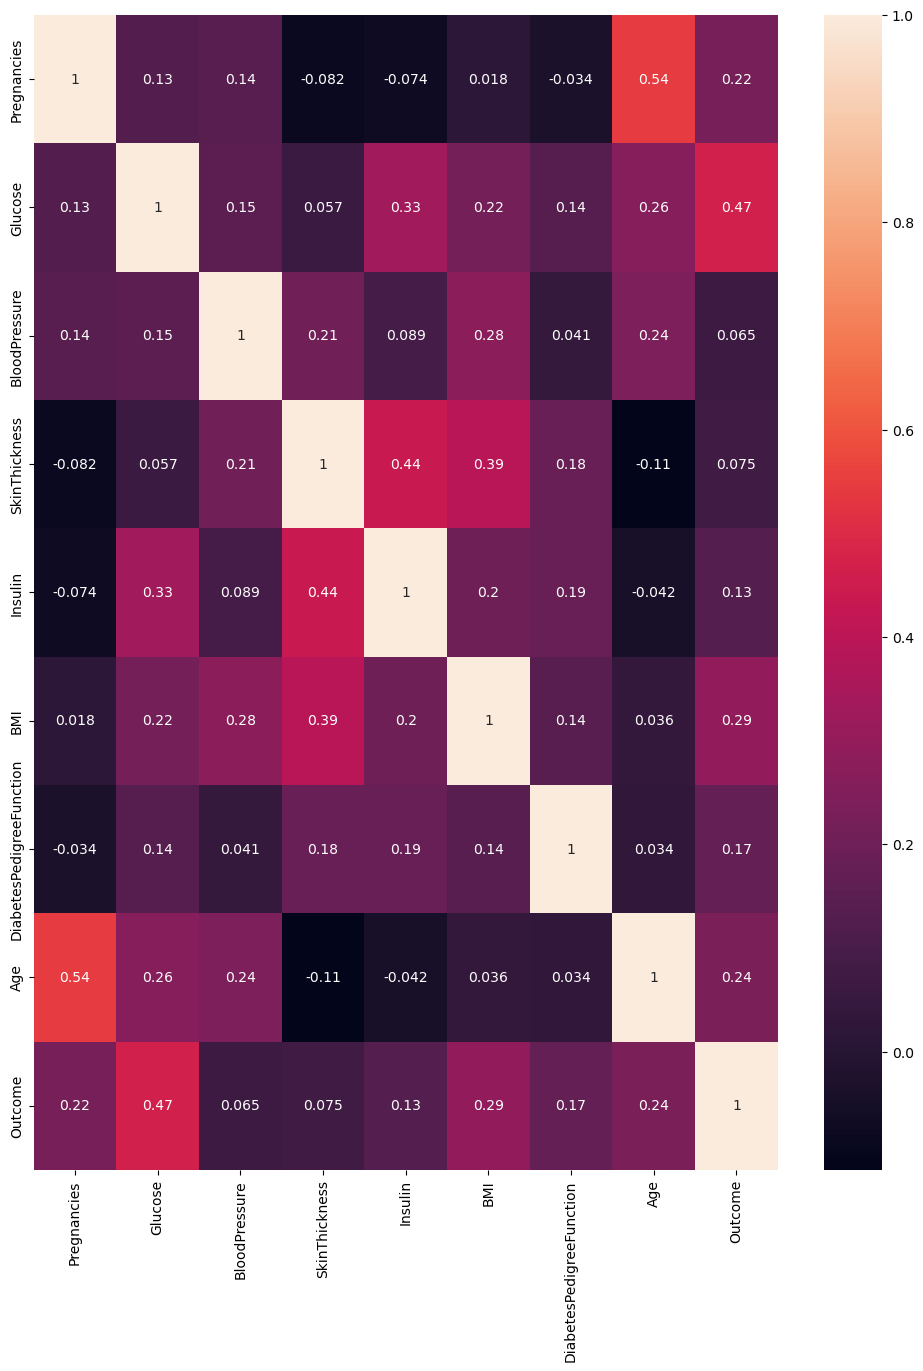

In [16]:
plt.figure(figsize=(12, 15))
sns.heatmap(data=df.corr(), annot=True)

In [29]:
## Dependent and independent variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [37]:
classifier

DecisionTreeClassifier()

In [38]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

[Text(0.5930078125, 0.9666666666666667, 'x[1] <= 154.5\ngini = 0.455\nsamples = 537\nvalue = [349, 188]'),
 Text(0.273515625, 0.9, 'x[7] <= 28.5\ngini = 0.383\nsamples = 454\nvalue = [337, 117]'),
 Text(0.145, 0.8333333333333334, 'x[1] <= 127.5\ngini = 0.22\nsamples = 238\nvalue = [208, 30]'),
 Text(0.08, 0.7666666666666667, 'x[5] <= 49.1\ngini = 0.117\nsamples = 192\nvalue = [180, 12]'),
 Text(0.07, 0.7, 'x[5] <= 31.4\ngini = 0.1\nsamples = 190\nvalue = [180, 10]'),
 Text(0.02, 0.6333333333333333, 'x[6] <= 0.672\ngini = 0.018\nsamples = 111\nvalue = [110, 1]'),
 Text(0.01, 0.5666666666666667, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.03, 0.5666666666666667, 'x[6] <= 0.697\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.02, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.12, 0.6333333333333333, 'x[4] <= 9.0\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.08, 0.5666666666666667, 'x[1] <= 

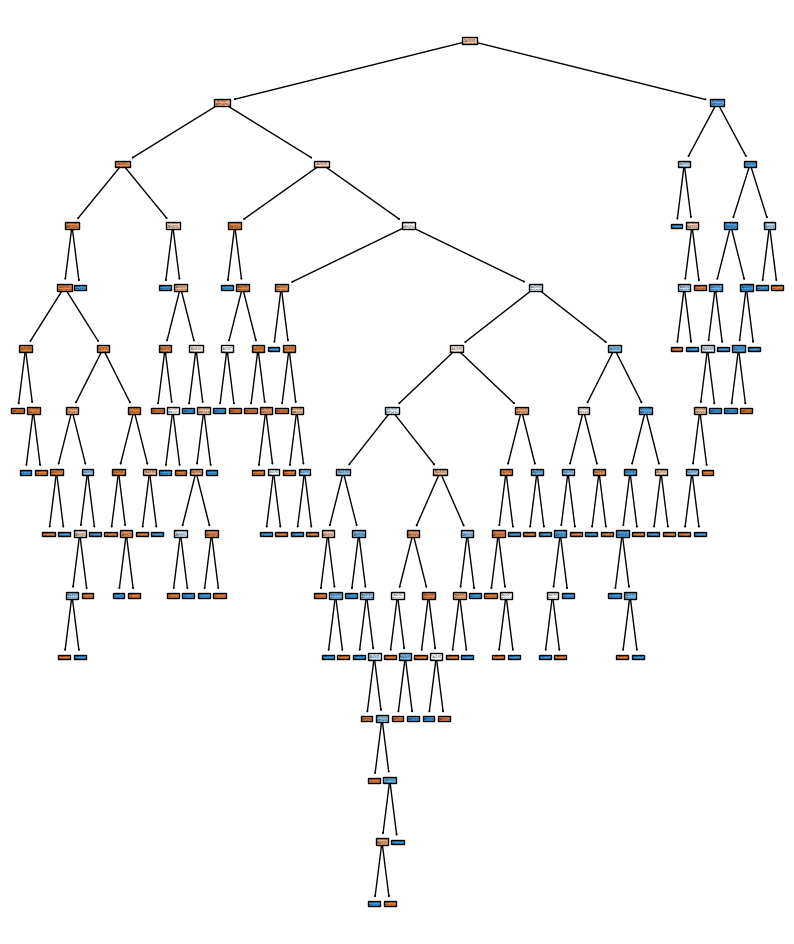

In [40]:
from sklearn import tree
plt.figure(figsize=(10, 12))
tree.plot_tree(classifier, filled = True)

In [41]:
# Prediction
y_pred = classifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score, r2_score, classification_report
score = accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_pred,y_test))

0.7056277056277056
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       131
           1       0.70      0.56      0.62       100

    accuracy                           0.71       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.70      0.71      0.70       231



## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
classifier=DecisionTreeClassifier()
clf = GridSearchCV(classifier, param_grid=parameter, cv = 5, scoring='accuracy')

In [56]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [57]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.
## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [58]:
y_pred = clf.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.7359307359307359
              precision    recall  f1-score   support

           0       0.73      0.85      0.78       130
           1       0.75      0.59      0.66       101

    accuracy                           0.74       231
   macro avg       0.74      0.72      0.72       231
weighted avg       0.74      0.74      0.73       231

